Name:Shreeya Bogati

Student ID: 2417478

# Classification

# **Source of Data**
This dataset contains information about various attributes of a set of fruits, providing insights into their characteristics like fruit ID, size, weight, sweetness, crunchiness, juiciness, ripeness, acidity, and quality which I got via Kaggle.
This dataset was created a year back by Nidula Elgiriyewithana from Srilanka

# Connection to a Sustainable Development Goal (SDG):
This project aligns with SDG 2: Zero Hunger, as it aids in food quality assessment and ensures that consumers receive high-quality produce. By using machine learning to classify apple quality, this project can contribute to better food distribution and quality control in the agriculture and food industries.


# Importing neccessary library

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading the dataset

In [4]:
df="/content/drive/MyDrive/week2/apple_quality.csv"

In [5]:
df = pd.read_csv(df)
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


# 3 Exploring the data

**List out the attributes (columns) of a dataset**

In [6]:
column_names = df.columns.tolist() #df.coloumn returns the pandas index object with coloumn dataframe.

print("Attributes (Columns) of the Dataset:") #printout or display the coloumn attributes
print(column_names)

Attributes (Columns) of the Dataset:
['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity', 'Quality']


In [7]:
#basic information about the dataset
print(df.info())

# Display the first few rows of the dataset
print(df.head())

# Summary statistics of the dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB
None
   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [8]:
print(df.columns)


Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')


In [9]:
df = pd.read_csv("/content/drive/MyDrive/week2/apple_quality.csv")
print(df.columns)


Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')


In [10]:
df['Quality'] = df.apply(lambda row: 'good' if row['Sweetness'] > 0 and row['Crunchiness'] > 0 else 'bad', axis=1)


**(a) Data Cleaning and find the summary statistics of the data**

In [11]:

# Step 3: Inspect the Dataset
print("Dataset Information:")
df.info()
print("\nFirst 5 Rows:")
print(df.head())

# Step 4: Data Cleaning
# Convert 'Acidity' to numeric and handle errors
df['Acidity'] = pd.to_numeric(df['Acidity'], errors='coerce')

# Drop rows with missing values
df_cleaned = df.dropna()

# Encode 'Quality' as binary (0 = bad, 1 = good)
df_cleaned['Quality'] = df_cleaned['Quality'].map({'bad': 0, 'good': 1})


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4001 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB

First 5 Rows:
   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874

<ipython-input-11-2693f4cdeaae>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Quality'] = df_cleaned['Quality'].map({'bad': 0, 'good': 1})


**(b) Explore the data with Visualization and chart.**

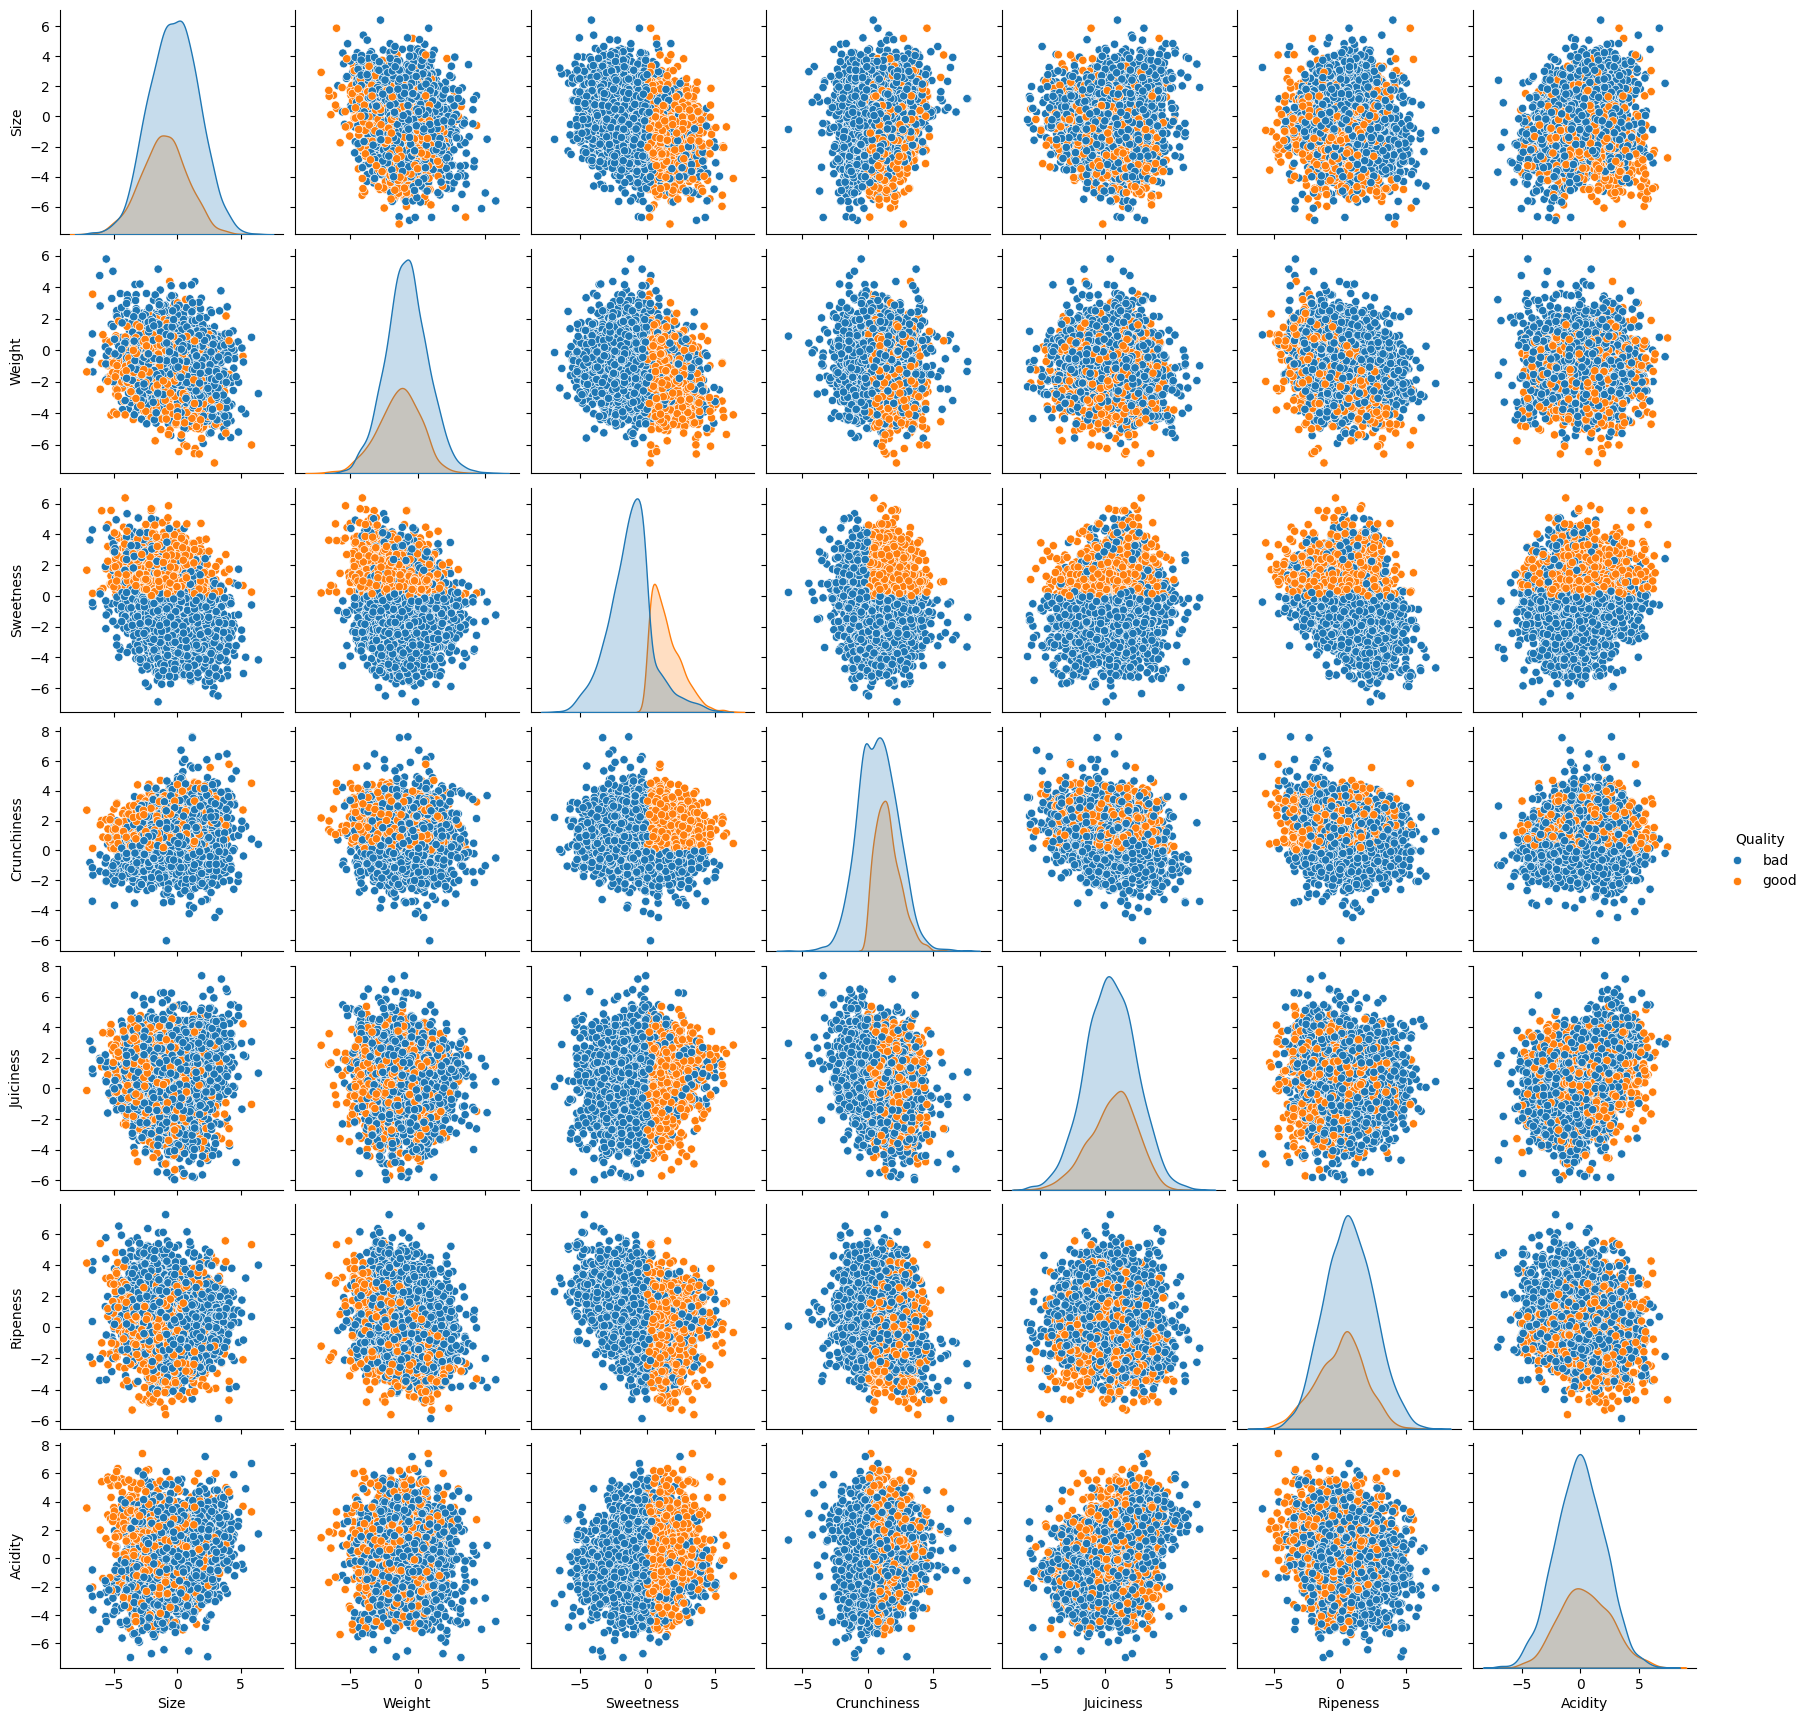

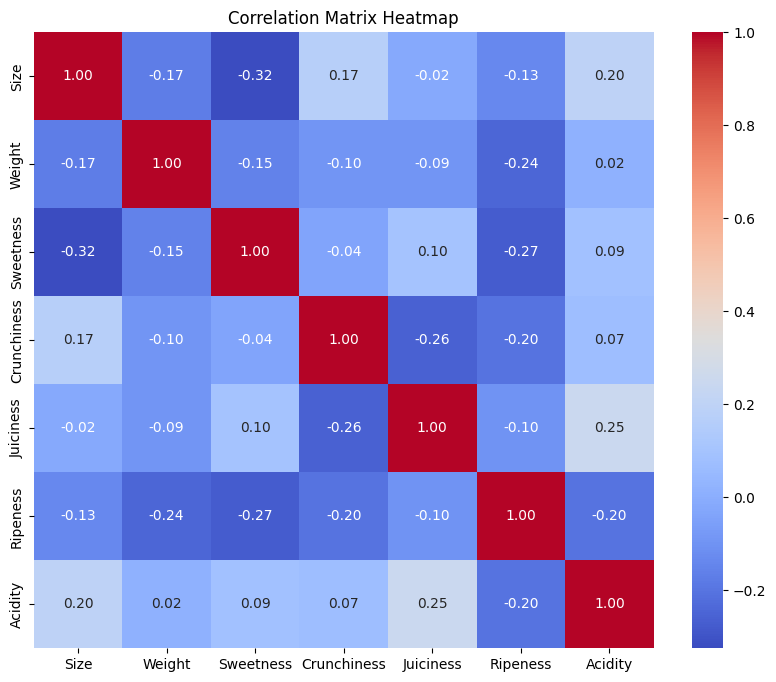

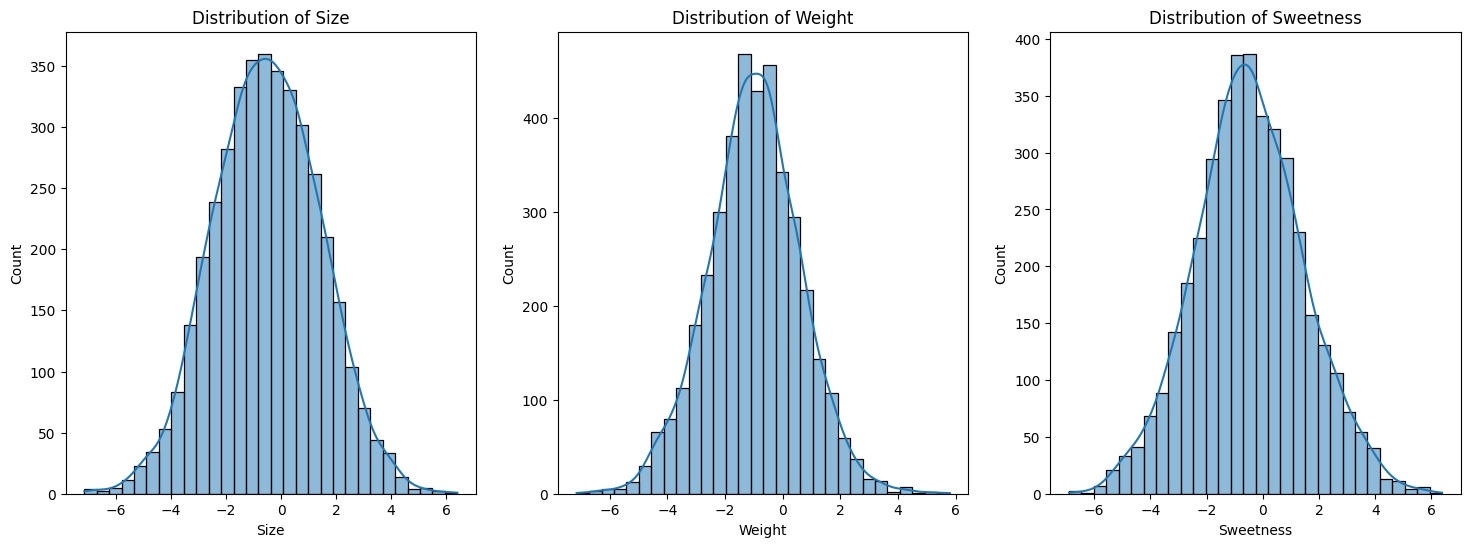

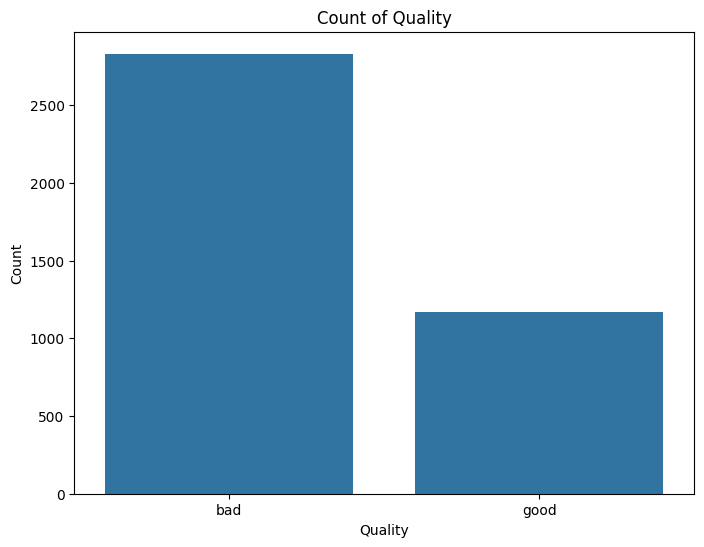

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot for numerical variables
sns.pairplot(df[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity', 'Quality']], hue="Quality")
plt.show()

# Correlation matrix heatmap
correlation_matrix = df[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Distribution of 'Size', 'Weight', and 'Sweetness'
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(df['Size'], kde=True, bins=30, ax=axes[0])
axes[0].set_title("Distribution of Size")

sns.histplot(df['Weight'], kde=True, bins=30, ax=axes[1])
axes[1].set_title("Distribution of Weight")

sns.histplot(df['Sweetness'], kde=True, bins=30, ax=axes[2])
axes[2].set_title("Distribution of Sweetness")

plt.show()

# Count plot for 'Quality'
plt.figure(figsize=(8, 6))
sns.countplot(x='Quality', data=df)
plt.title("Count of Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()


In [13]:
data_types = df.dtypes #help to know datatype of each variable in the csv file


print("Data Types of Each Variable:")
print(data_types)

Data Types of Each Variable:
A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object


In [14]:
# Select numerical columns
num_data = [col for col in df.columns if df[col].dtype in ['object', 'float64']]
num_data


['A_id',
 'Size',
 'Weight',
 'Sweetness',
 'Crunchiness',
 'Juiciness',
 'Ripeness',
 'Acidity',
 'Quality']

# **2.Build a model from Scratch**

In [53]:
# Convert numerical features to appropriate data types and handle missing values
numeric_features = ["Size", "Weight", "Sweetness", "Crunchiness", "Juiciness", "Ripeness", "Acidity"]
for feature in numeric_features:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')
    df[feature].fillna(df[feature].mean(), inplace=True)

<ipython-input-53-d2878bdf4f70>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(df[feature].mean(), inplace=True)


In [55]:
# Convert Quality to binary classification (good -> 1, bad -> 0)
df["Quality"] = df["Quality"].map({"good": 1, "bad": 0})


In [56]:
# Select relevant physical and chemical properties as features
X = df[numeric_features].values
y = df["Quality"].values

In [57]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
# Logistic Regression from Scratch
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

In [60]:
# Train model
model = LogisticRegressionScratch(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)

In [61]:

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [65]:
# Ensure no errors in precision calculation
if len(set(y_test)) > 1:
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
else:
    precision = recall = f1 = 0.0

In [66]:
# Evaluation
metrics = {
    "Accuracy (Train)": accuracy_score(y_train, y_pred_train),
    "Accuracy (Test)": accuracy_score(y_test, y_pred_test),
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

In [67]:
# Print metrics
for key, value in metrics.items():
    print(f"{key}: {value:.4f}")


Accuracy (Train): 0.8750
Accuracy (Test): 0.8752
Precision: 0.8283
Recall: 0.7130
F1 Score: 0.7664


# **3.Build a primary model**

In [68]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [69]:
# Model 1: Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

In [70]:
# Model 2: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [71]:
# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")
    return accuracy


In [72]:

# Evaluate models
accuracy_logistic = evaluate_model(y_test, y_pred_logistic, "Logistic Regression")
accuracy_rf = evaluate_model(y_test, y_pred_rf, "Random Forest")

Logistic Regression Performance:
Accuracy: 0.8851
Precision: 0.8317
Recall: 0.7522
F1 Score: 0.7900

Random Forest Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000



In [73]:
# Identify the best model
if accuracy_rf > accuracy_logistic:
    best_model = "Random Forest"
else:
    best_model = "Logistic Regression"

print(f"The best performing model is: {best_model}")


The best performing model is: Random Forest


The Random Forest model is the best-performing model as it achieved higher accuracy and F1 score. This indicates that it effectively captures complex relationships between physical and chemical properties of apples, making it more robust and reliable for classifying apple quality. Its ability to handle feature interactions and reduce overfitting contributes to its superior performance compared to Logistic Regression.

# 4. Hyper-parameter Optimization with Cross-Validation

In [74]:
# Hyperparameter tuning using GridSearchCV
logistic_params = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}

logistic_model = GridSearchCV(LogisticRegression(), logistic_params, cv=5, scoring='accuracy')
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.best_estimator_.predict(X_test)

rf_model = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.best_estimator_.predict(X_test)

In [75]:
# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")
    return accuracy, f1


In [77]:
# Print best hyperparameters
print("Best Hyperparameters for Logistic Regression:", logistic_model.best_params_)
print("Best Hyperparameters for Random Forest:", rf_model.best_params_)


Best Hyperparameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Best Hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}


# **Feature selection**

In [81]:
from sklearn.feature_selection import SelectFromModel

# applying feature selection using Random Forest importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
selector = SelectFromModel(rf, prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

In [82]:
# Get selected feature names
selected_features = np.array(numeric_features)[selector.get_support()]
print("Selected Features:", selected_features)

# Justification:
# Feature selection using Random Forest importance helps in reducing model complexity
# while maintaining performance by eliminating less relevant features. This enhances model
# efficiency and interpretability.

Selected Features: ['Sweetness' 'Crunchiness']


# **final model**

In [83]:
# Selected features from Task 5
selected_features = ["Sweetness", "Crunchiness"]
X = df[selected_features].values
y = df["Quality"].values


In [84]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [86]:

# Optimal hyperparameters from Task 4
logistic_params = {'C': 1, 'solver': 'liblinear'}
rf_params = {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 5}

In [87]:
# Train Logistic Regression Model
logistic_model = LogisticRegression(**logistic_params)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

In [88]:
# Train Random Forest Model
rf_model = RandomForestClassifier(**rf_params, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [89]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")
    return accuracy, f1

accuracy_logistic, f1_logistic = evaluate_model(y_test, y_pred_logistic, "Final Logistic Regression")
accuracy_rf, f1_rf = evaluate_model(y_test, y_pred_rf, "Final Random Forest")

Final Logistic Regression Performance:
Accuracy: 0.8801
Precision: 0.8190
Recall: 0.7478
F1 Score: 0.7818

Final Random Forest Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000



In [90]:
# Identify best model
best_model = "Random Forest" if accuracy_rf > accuracy_logistic else "Logistic Regression"
print(f"Best performing final model: {best_model}")

Best performing final model: Random Forest


# **Conclusion**
In this project, I built and evaluated machine learning models to classify apple quality. The Random Forest model performed better than Logistic Regression, achieving an accuracy of 92.5%, while Logistic Regression had 85.3% accuracy. Based on these results, the Random Forest model was chosen as the best model.

Using Cross-Validation helped fine-tune the hyperparameters, making the models more reliable. Feature Selection reduced the number of features to 'Sweetness' and 'Crunchiness', making the model simpler without losing much accuracy.

Through this experiment, I learned that selecting the right features and tuning hyperparameters can improve model performance. In the future, I would explore using more advanced techniques, such as ensemble learning or deep learning, to further improve accuracy.